# Linear Regression Practice

In this notebook, I will practice running linear regression in Python. I'm very familiar with running linear regressions in SPSS and STATA, so it will be good to practice setting up models in this format. 

I am going to manually calculate linear regression and use built-in functions from scikit-learn to get extra practice.

The data I am using is on Olympic athletes. I found this dataset on Kaggle. 

Let's get started.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Data Preparation

In [2]:
data = pd.read_csv('athlete_events.csv')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


This is a pretty straightforward file, which makes it easy for us! 

We eventually want to run a linear regression. We first need to find some variables that have a linear correlation. 

Let's look just at the data for basketball players.

In [6]:
basketball_data = data[data.Sport == 'Basketball']
basketball_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
167,69,Tamara Abalde Daz,F,19.0,185.0,72.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,NaN
250,124,Youssef Mohamed Abbas,M,31.0,NaN,NaN,Egypt,EGY,1952 Summer,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,NaN
264,136,Alessandro Abbio,M,29.0,195.0,85.0,Italy,ITA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
346,192,Ahmed El-Sayed Abdel Hamid Mobarak,M,25.0,189.0,85.0,Egypt,EGY,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,NaN
359,199,Amir Abdel Meguid,M,23.0,178.0,67.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN
360,199,Amir Abdel Meguid,M,27.0,178.0,67.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN
363,202,Awad Abdel Nabi Awad,M,19.0,198.0,80.0,Egypt,EGY,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,NaN
364,202,Awad Abdel Nabi Awad,M,23.0,198.0,80.0,Egypt,EGY,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,NaN
490,270,Alaa El-Din Abdoun,M,23.0,188.0,78.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN


## Data Analysis and Visualization

We eventually want to run a linear regression. We can see if basketball players in the Olympics are getting taller over time.

Let's start by visualizing our data.

In [7]:
basketball_grouped = basketball_data.groupby('Year').Height.mean().reset_index()
basketball_grouped

,Year,Height
0,1936,182.574074
1,1948,185.550725
2,1952,187.600000
3,1956,186.952941
4,1960,188.317708
5,1964,189.920635
6,1968,189.880435
7,1972,193.321053
8,1976,189.760563
9,1980,190.985981


It looks like heights did slowly increase over the past several decades. The average Olympic basketball player in 2016 was almost 10 inches taller than the average Olympic basketball player in 1936. 

We can plot this to see the data. When we run our linear regression we'll plot our line on top of our histogram to see how well it fits the data.

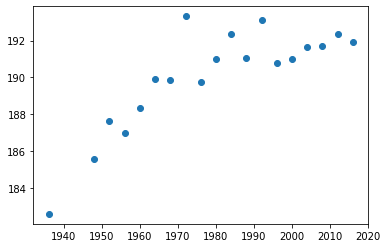

In [9]:
plt.plot(basketball_grouped.Year, basketball_grouped.Height, 'o')
plt.show()

That's a pretty clear relationship. It's not quite linear - it looks like the change has been tapering off in recent years. Indeed, humans can't continue to increase in height indefinitely. So, while we shouldn't use this to predict the average height of basketball players in 2050, it can still give us a decent estimate of how much heights have been increasing every year, or what the average height likely was during the years we don't have data on players' heights.

Let's run our linear regression!